Objective : 

    What is the contribution of TV ads in sales ? 
    What is the contribution of Radio ads in sales ?
    What is the contribution of Banners ads in sales ?
    How many sales without Ads ?

In [1]:
from IPython.core.interactiveshell import InteractiveShell
from IPython.display import display
InteractiveShell.ast_node_interactivity = "all"


import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, TimeSeriesSplit

In [2]:
# NB : parse_dates for direct datetime + index_col to put date as indexes

df = pd.read_csv(r'/mnt/d/BusinessSuiteData/BS_epsilon_data/mmm_kubler_medium.csv', 
                 parse_dates=['Date'], 
                 index_col='Date')

<center>EDA

In [3]:
df.head(3)

,TV,Radio,Banners,Sales
Date,,,,
2018-01-07,13528.1,0.00,0.00,9779.80
2018-01-14,0.0,5349.65,2218.93,13245.19
2018-01-21,0.0,4235.86,2046.96,12022.66


In [4]:
# Data on 200 weeks, one row per week

df.shape

(200, 4)

In [5]:
df.dtypes

TV         float64
Radio      float64
Banners    float64
Sales      float64
dtype: object

In [6]:
df.describe()

,TV,Radio,Banners,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,2946.207650,2213.585050,1520.722550,10668.141500
std,4749.646908,2505.967886,870.764354,2700.706683
min,0.000000,0.000000,0.000000,4532.330000
25%,0.000000,0.000000,1657.195000,8396.942500
50%,0.000000,0.000000,1918.990000,10853.105000
75%,7938.527500,4624.027500,2069.767500,12566.995000
max,13901.550000,7696.220000,2518.880000,17668.340000


In [7]:
# No missing values
# => Sales have occured every weeks

df.isna().value_counts().to_frame()

,,,,0
TV,Radio,Banners,Sales,
False,False,False,False,200


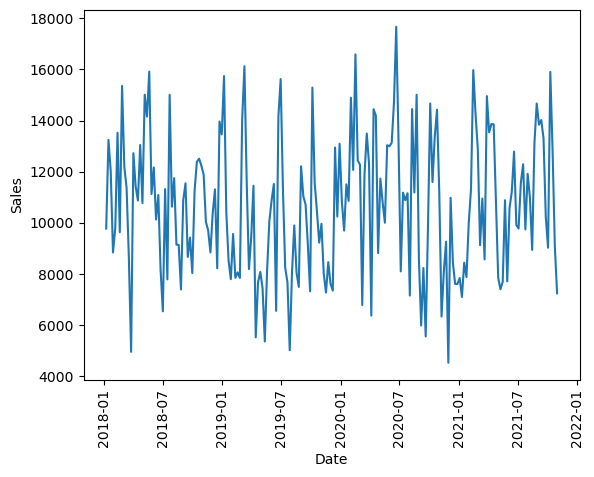

In [8]:
# Plots Sales over time

fig, ax = plt.subplots()
sns.lineplot(data = df, x = 'Date', y = 'Sales', ax = ax)
plt.xticks(rotation=90)
plt.show();

In [9]:
# The most media used is Banners, then Radio followed by TV
# NB : Banners index != TV 1 rADIO INDEX

pd.concat([(df['TV'] == 0).value_counts().to_frame(),
           (df['TV'] == 0).value_counts(normalize=True).mul(100).to_frame(name='%')], axis= 1)

pd.concat([(df['Radio'] == 0).value_counts().to_frame(),
           (df['Radio'] == 0).value_counts(normalize=True).mul(100).to_frame(name='%')], axis= 1)

pd.concat([(df['Banners'] == 0).value_counts().to_frame(),
           (df['Banners'] == 0).value_counts(normalize=True).mul(100).to_frame(name='%')], axis= 1)

,TV,%
True,142,71.0
False,58,29.0


,Radio,%
True,108,54.0
False,92,46.0


,Banners,%
False,152,76.0
True,48,24.0


In [10]:
# The largest advertising spendings come from TV followed by Radio, followed by Banners

print('TV : ', df['TV'].sum(), '$')
print('Radio : ', df['Radio'].sum(), '$')
print('Banners : ', df['Banners'].sum(), '$')

TV :  589241.53 $
Radio :  442717.01 $
Banners :  304144.51 $


In [11]:
# Average cost pêr advertising per media trhough the 200 weeks


print('TV :', df['TV'].sum()/df[df['TV'] != 0].shape[0], '$')
print('Radio :', df['Radio'].sum()/df[df['Radio'] != 0].shape[0], '$')
print('Banners :', df['Banners'].sum()/df[df['Banners'] != 0].shape[0], '$')

TV : 10159.336724137931 $
Radio : 4812.141413043479 $
Banners : 2000.9507236842105 $


<center>Simple Linear Regression

In [12]:
# Separates dependant (Sales) from independants variables

X = df.drop(columns=['Sales'])
y = df['Sales']

In [13]:
# Inits a linear regression

lr = LinearRegression()

In [14]:
# Cross validate 
# N.B : TimeSeriesSplit

scores = cross_val_score(lr, X, y, cv=TimeSeriesSplit())

scores

array([0.69594303, 0.69302285, 0.66850729, 0.78807363, 0.73512387])

In [15]:
# Reasonably good model

np.average(scores)

0.7161341347467671

In [16]:
# Fit the model on the whole dataset

lr.fit(X, y)

LinearRegression()

In [17]:
# Coefficeintss of the ads + baseline (~6678)

lr.feature_names_in_
lr.coef_
lr.intercept_

array(['TV', 'Radio', 'Banners'], dtype=object)

array([0.35968382, 0.48833246, 1.2159193 ])

6678.396933606162

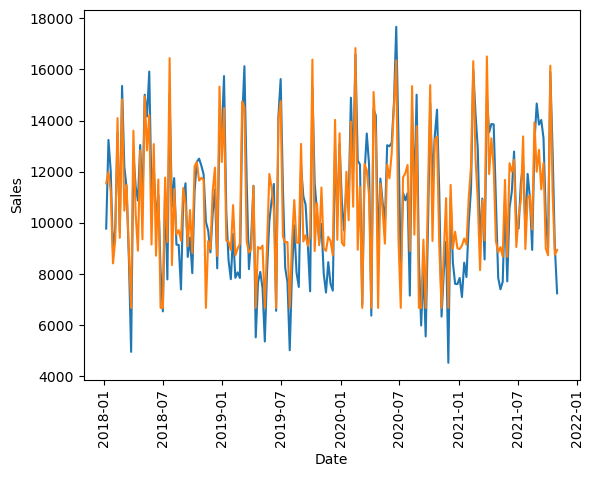

In [18]:
# Computes predictions for visualization

predictions = lr.predict(X)

fig, ax = plt.subplots()
sns.lineplot(data = df, x = 'Date', y = 'Sales', ax = ax)
sns.lineplot(data = df, x = 'Date', y = predictions, ax = ax)

plt.xticks(rotation=90)
plt.show();

<center>Breaking Down the Sales

In [19]:
# Focus on 2021-10-10

lr.predict(df.loc[['2021-10-10'], ['TV', 'Radio', 'Banners']])

#VS

df.loc[['2021-10-10'], 'Sales']

array([16147.01594158])

Date
2021-10-10    15904.11
Name: Sales, dtype: float64

Unadjusted Ads contributions for the 2021-10-10

In [20]:
# Unadjusted contribution of TV

lr.feature_names_in_[0]
lr.coef_[0]
df.loc[['2021-10-10'], ['TV']].values

lr.coef_[0]*df.loc[['2021-10-10'], ['TV']].values

'TV'

0.3596838209896533

array([[11543.58]])

array([[4152.0389623]])

In [21]:
# Unadjusted contribution of Radio

lr.feature_names_in_[1]
lr.coef_[1]
df.loc[['2021-10-10'], ['Radio']].values

lr.coef_[1]*df.loc[['2021-10-10'], ['Radio']].values

'Radio'

0.4883324635915395

array([[4615.35]])

array([[2253.82523584]])

In [22]:
# Unadjusted contribution of Banners

lr.feature_names_in_[2]
lr.coef_[2]
df.loc[['2021-10-10'], ['Banners']].values

lr.coef_[2]*df.loc[['2021-10-10'], ['Banners']].values

'Banners'

1.2159193013722258

array([[2518.88]])

array([[3062.75480984]])

In [23]:
# Total

lr.coef_[0]*df.loc[['2021-10-10'], ['TV']].values\
+lr.coef_[1]*df.loc[['2021-10-10'], ['Radio']].values\
+lr.coef_[2]*df.loc[['2021-10-10'], ['Banners']].values\
+ lr.intercept_ # Baseline

df.loc[['2021-10-10'], 'Sales'].values # Real value

array([[16147.01594158]])

array([15904.11])

Adjusted contributions  for the 2021-10-10

In [24]:
# Computes the correction factor

correction_factor = 15904.11/16147.01594158

In [25]:
# Total

lr.coef_[0]*df.loc[['2021-10-10'], ['TV']].values*correction_factor\
+lr.coef_[1]*df.loc[['2021-10-10'], ['Radio']].values*correction_factor\
+lr.coef_[2]*df.loc[['2021-10-10'], ['Banners']].values*correction_factor\
+ lr.intercept_*correction_factor 

array([[15904.11]])

In [26]:
# Contributions

print('Contribution of TV the 2021-10-10 : ', lr.coef_[0]*df.loc[['2021-10-10'], ['TV']].values*correction_factor, '$')
print('Contribution of Radio the 2021-10-10 : ', lr.coef_[1]*df.loc[['2021-10-10'], ['Radio']].values*correction_factor, '$')
print('Contribution of Banner the 2021-10-10 : ', lr.coef_[2]*df.loc[['2021-10-10'], ['Banners']].values*correction_factor, '$')
print('Natural Sales the 2021-10-10 : ', lr.intercept_*correction_factor , '$')

Contribution of TV the 2021-10-10 :  [[4089.57819944]] $
Contribution of Radio the 2021-10-10 :  [[2219.92005218]] $
Contribution of Banner the 2021-10-10 :  [[3016.68057894]] $
Natural Sales the 2021-10-10 :  6577.931169450618 $


Sales contributions for the whole dataset

In [27]:
# Sets up variables

weights = pd.Series(lr.coef_, index = lr.feature_names_in_)

weights

base = lr.intercept_

base

TV         0.359684
Radio      0.488332
Banners    1.215919
dtype: float64

6678.396933606162

In [28]:
# Unadjusted contributions

unadj_contributions = X.mul(weights).assign(Base=base)

unadj_contributions.head(3)

,TV,Radio,Banners,Base
Date,,,,
2018-01-07,4865.838699,0.000000,0.000000,6678.396934
2018-01-14,0.000000,2612.407764,2698.039815,6678.396934
2018-01-21,0.000000,2068.507949,2488.938173,6678.396934


In [29]:
# Adjusted contributions

adj_contributions = unadj_contributions.div(unadj_contributions.sum(axis = 1), axis = 0).mul(y, axis=0)

adj_contributions.head(3)

,TV,Radio,Banners,Base
Date,,,,
2018-01-07,4122.137734,0.000000,0.000000,5657.662266
2018-01-14,0.000000,2886.169485,2980.775165,7378.245350
2018-01-21,0.000000,2213.360195,2663.232057,7146.067747


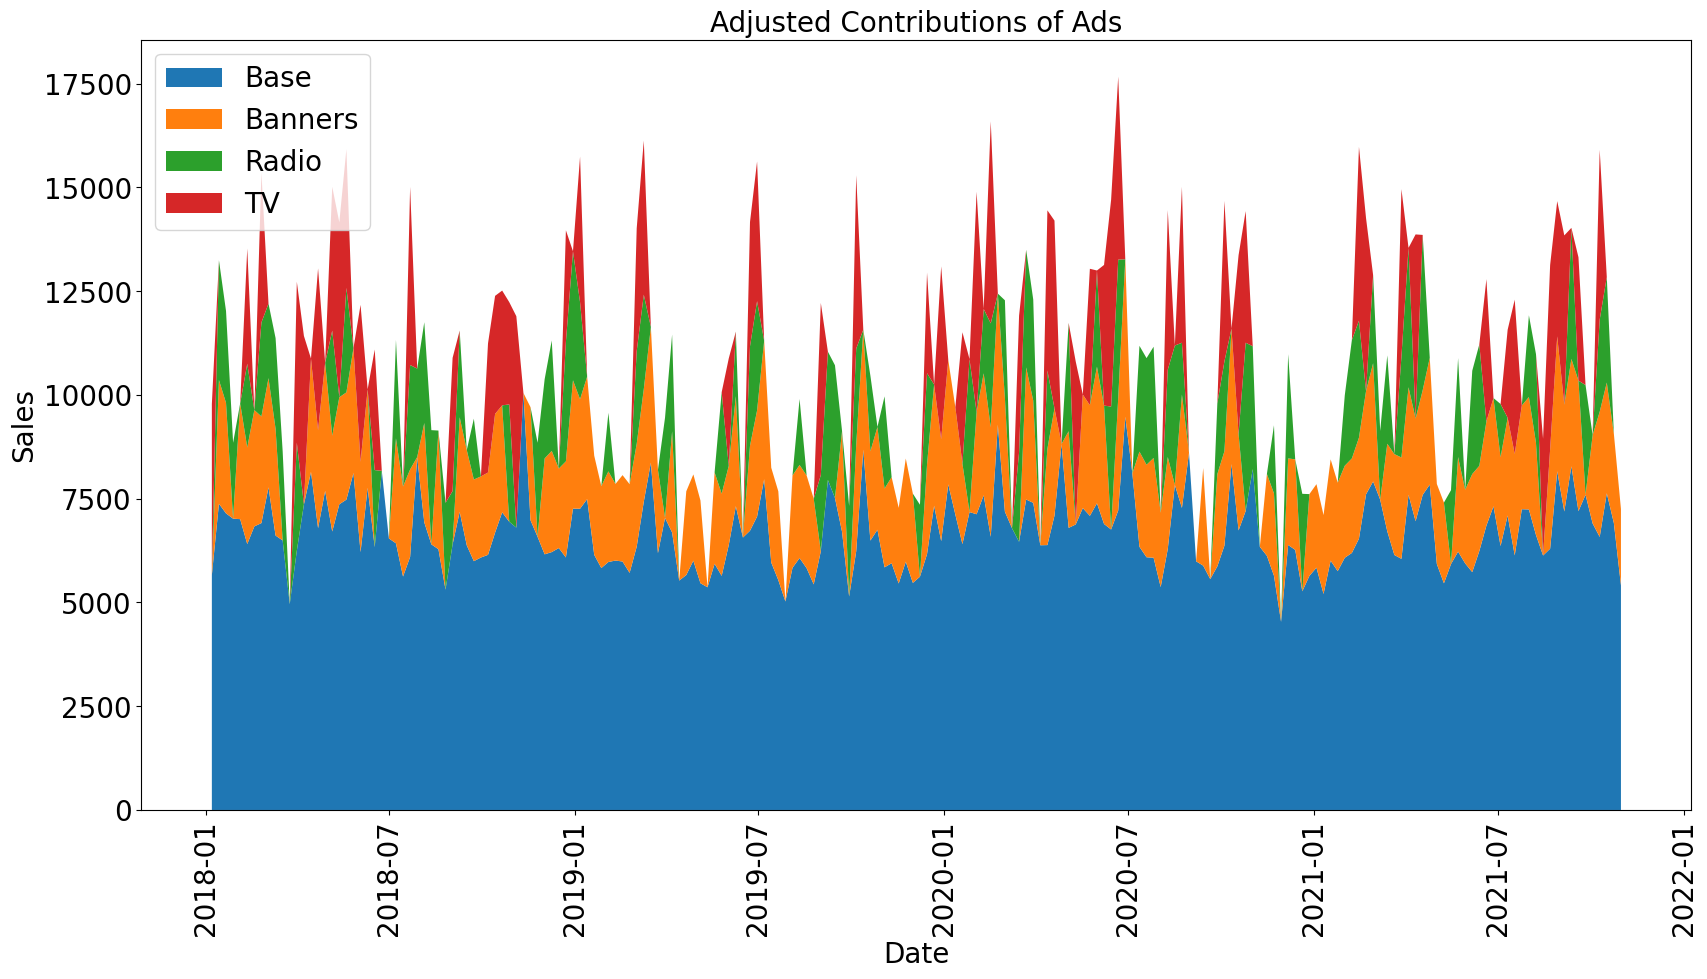

In [30]:
# Plots Adjusted Contributions of Ads

fig, ax = plt.subplots(figsize=(20,10))

plt.stackplot(adj_contributions.index, 
              adj_contributions['Base'],
              adj_contributions['Banners'],
              adj_contributions['Radio'],
              adj_contributions['TV'], 
             labels = ['Base', 'Banners', 'Radio', 'TV'])

plt.xticks(rotation=90)

plt.title('Adjusted Contributions of Ads', fontsize=20)

plt.legend(loc='upper left', fontsize=20)

plt.xlabel('Date', fontsize=20)
plt.ylabel('Sales', fontsize=20)

ax.tick_params(axis='both', labelsize=20)

plt.show();

<center>Return On Investment

In [31]:
# Channel ROI = Sales from the channel / Channel spendings

In [32]:
print('TV ROI : ', adj_contributions['TV'].sum()/df['TV'].sum(), '$')
print('Banners ROI : ', adj_contributions['Banners'].sum()/df['Banners'].sum(), '$')
print('Radio ROI : ', adj_contributions['Radio'].sum()/df['Radio'].sum(), '$')

TV ROI :  0.3602450071355312 $
Banners ROI :  1.2147284836194052 $
Radio ROI :  0.48949589369308083 $
